<!-- comment this is a comment heading -->
# CS 229: Machine Learning

<!-- How to make a checkbox: <input type="checkbox">Completed?</input> -->

### Supervised Learning

- **Labelled Data**: Data with known labels (e.g., images, text)
- **Training Set**: A subset of the labelled data used to train a model
- **Testing Set**: A subset of the labelled data used to evaluate the trained model

The hypothesis function $h(x)$ is a function that maps input features to output labels. We can use supervised learning algorithms to learn this hypothesis function from the training set. If we have two features, we can write the hypothesis function as follows:

$ h(x) = \sum_{j=0}^{2} \theta_j x_j $

where $\theta_j$ are the weights and $x_j$ are the input features; we define $x_0 = 1$ and therefore $\theta_0$ is the bias term.

$ \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \\ \theta_2 \end{pmatrix} $
$ x = \begin{pmatrix} 1 \\ x_1 \\ x_2 \end{pmatrix} $

This is an affine function (which means a linear function with a constant term).

| Terminology |
| --- |
| $ \theta = $ "parameters" |
| $ m = $ "number of training examples" |
| $ n = $ "number of features" |
| $ x = $ "input data / features" |
| $ y = $ "output labels / target data" |
| $ (x, y) $ = "training example" |

In [317]:
import numpy as np
#np.random.seed(42)

# Define the hypothesis function
def h(x, theta):
    return x @ theta
    # return np.dot(x, theta)

n = 2 # number of features (excluding bias term)
m = 10 # number of training examples

features = n+1 # including bias term

x = np.random.rand(m, features) # input data
theta = np.random.rand(features)
# x = np.array([[1,2,3], [4,5,6]])

theta = np.array([1, 2, 3])
print(f'{x.shape=} {theta.shape=}')
# print(f'{x=} {theta=}')
print(h(x, theta))
print(np.mean(h(x, theta)))

x.shape=(10, 3) theta.shape=(3,)
[3.41294576 1.75326503 4.24482777 5.43309214 2.44961306 2.74346739
 3.06829328 3.92873228 3.60080464 4.67245747]
3.5307498829082817


The goal is to choose the parameters $\theta$ that minimize the error between the predicted output and the actual target data.

Choose $ \theta $ such that $ h(x) \approx y $.

$ h_\theta(x) = h(x) $

$ x_{}^{(i)} $ is the $i$-th training example.

Cost function: $ J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $

minimize $ J(\theta) $ to find the optimal $\theta$.

### Gradient Descent

Start with some initial guess for $\theta$, and iteratively update it based on the gradient of the cost function. The gradient is a vector that points in the direction of steepest ascent of the cost function. The learning rate determines how fast the parameters are updated.

The formula for updating $\theta$ using gradient descent is:

$ \theta_j := \theta_j - \alpha \cdot \frac{\partial}{\partial \theta_j} J(\theta)$ for all $j$.

Where:

- $j$ is the index of the parameter being updated
- $J(\theta)$ is the cost function evaluated at $\theta$
- $\alpha$ is the learning rate

The learning rate should be chosen carefully, as too small a learning rate can cause slow convergence, while too large a learning rate can cause overshooting and instability.

> "If the features are scaled to +1 to -1, learning rate could be chosen to start at 0.01."

In [1048]:
def update_theta(theta, alpha, grad):
    return theta - alpha * grad

def gradient_descent(X, y, alpha=0.001, num_iterations=100000):
    """
    (Batch) gradient descent algorithm for linear regression.
    """
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)

    for i in range(num_iterations):
        # Calculate the predictions
        y_pred = X @ theta
        # Calculate the gradients
        grad = ((y_pred - y) @ X)
        # Update the parameters
        theta = update_theta(theta, alpha, grad)
        # print(f'{i}: {theta=} {grad=}')
    return theta

def stochastic_gradient_descent(X, y, alpha=0.005, num_iterations=100000):
    """
    Stochastic gradient descent algorithm for linear regression.
    This version uses a single training example at each iteration compared to the (batch) gradient descent
    above which updates using the entire dataset at each iteration. This can be faster than the batch
    gradient descent but may not converge as quickly.
    """
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)
    for i in range(num_iterations):
        for j in range(X.shape[0]):
            y_pred_j = X[j] @ theta
            error = y_pred_j - y[j]
            grad = error * X[j]
            theta = update_theta(theta, alpha, grad)
        if i % 10000 == 0:
            print(f'{i}: {theta=} {grad=}')
    return theta

# Input:
#X = np.array([[1, 1, 1], [1, 2, 4], [1, 3, 9], [1, 4, 16]]) # first feature is the bias term, the x, then x^2

# define a function to translate x into a vector of 1,x,x^2
X_raw = [1, 2, 3, 4]
def translate_x(x):
    return np.array([1, x, x**2])

X = np.array([translate_x(x) for x in X_raw])

X = np.array([[1, -2], [2, 6], [3, 12], [4, 2]])

# Output:
# y = np.array([1, 4, 9, 16])  # non-linear -- y = x^2 
y = np.array([6, 16, 32, 54])  # non-linear -- y = 3x^2 + x + 2
# y = np.array([7, 12, 17, 22])  # y = 5x + 2
y = np.array([2, 6, 12, 20])  # y = x + x**2
y = np.array([-1, 8, 15, 6])  # y = a + b

print(f'{X.shape=} {y.shape=}')
#theta = gradient_descent(X, y)
theta = stochastic_gradient_descent(X, y)
print("Final theta:", theta)

def calculate_loss(X, y, theta):
    predictions = X @ theta
    loss = np.sum((predictions - y) ** 2)
    return loss

print(f'Loss after training: {calculate_loss(X, y, theta)}')

print(f'{X @ theta}')
#print(f'{translate_x(10) @ theta}')
print(f'{np.linalg.inv(X.T @ X) @ (X.T @ y)=}') # Algebraic solution when derivative of J(theta) = 0
print(f'{(np.linalg.inv(X.T @ X) @ (y.T @ X)).T=}')


X.shape=(4, 2) y.shape=(4,)
0: theta=array([0.23440305, 1.1605046 ]) grad=array([-12.18390486,  -6.09195243])
10000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
20000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
30000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
40000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
50000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
60000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
70000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
80000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
90000: theta=array([1., 1.]) grad=array([-1.06581410e-14, -5.32907052e-15])
Final theta: [1. 1.]
Loss after training: 8.874685183736383e-30
[-1.  8. 15.  6.]
np.linalg.inv(X.T @ X) @ (X.T @ y)=array([1., 1.])
(np.linalg.inv(X.T @ X) @ (y.T @ X)).T=array([1., 1.])


# Stochachastic Gradient Descent

When the number of training examples is large, it can be too expensive to analyse the entire dataset for each iteration. If for example your dataset is 1TB, just reading that dataset from disk becomes prohibitively slow.

Using stochastic gradient descent (SGD) allows you to perform an update per training example, rather than going through them all. This makes it much faster and more scalable for large datasets.

If you imagine gradient descent as a hill-climbing algorithm, GD is like taking one step at a time down the slope of the loss function. It starts at the top of the hill (the initial theta values) and moves downhill until it reaches the bottom (the minimum loss). GD chooses the steepest path to move down the hill at each step, whereas SGD only looks at a single example at a time and uses only that knowledge to step down the slope -- this may not be the optimium path and instead may move around noisily towards the minimum.

SGD by virtue of looking at individual examples, may also not converge exactly on the minimum and instead oscillate around the mininum. In contrast, GD will always converge to the global minimum if it is convex (i.e., there are no local minima). SGD however, does not guarantee convergence.

The learning rate corresponds roughly to how big a step you take down the slope at each iteration. If you set the learning rate too high, your model may overshoot the minimum and diverge. If you set it too low, your model will converge slowly and might never reach the minimum. The optimal learning rate depends on the specific problem and dataset.

You can also adjust the learning rate as e.g. 1 / (t + 1) where t is the iteration number. This is called a decay schedule.

# Mini-batch SGD

In mini-batch SGD, you randomly sample a subset of the data at each iteration. This can help reduce variance and improve convergence speed compared to vanilla SGD.

Randomly sampling for each batch is necessary for example if you consider that a dataset may be sorted such that all positive examples come before negative ones.

In [319]:
def sgd(X, y, lr=0.01, weights=None):
    """
    Perform stochastic gradient descent on the given data.
    Args:
        X (numpy.ndarray): Input features.
        y (numpy.ndarray): Target labels.
        lr (float): Learning rate.
    Returns:
        numpy.ndarray: Updated weights after SGD.
    """
    if weights is None:
        weights = np.zeros(X.shape[1])
    for i in range(len(y)):
        gradient = 2 * X[i] * (np.dot(X[i], weights) - y[i])
        weights -= lr * gradient
    return weights

X = np.array([[1, 2], [1, 4]])
y = np.array([0, 1])
weights = None
for i in range(1000):
    weights = sgd(X, y, weights=weights)  # This will update the weights based on the current data and learning rate.
    if i % 100 == 0:
        print(f"Iteration {i+1}: Loss = {np.mean((y - np.dot(X, weights))**2)}")

print("Updated weights:", weights)


Iteration 1: Loss = 0.23399999999999993
Iteration 101: Loss = 0.051146342994597964
Iteration 201: Loss = 0.02311130942281546
Iteration 301: Loss = 0.010443222173157794
Iteration 401: Loss = 0.004718940297267173
Iteration 501: Loss = 0.0021323301525087244
Iteration 601: Loss = 0.0009635281637131656
Iteration 701: Loss = 0.00043538591862812734
Iteration 801: Loss = 0.0001967362297009953
Iteration 901: Loss = 8.889847471163438e-05
Updated weights: [-0.9800318   0.49425807]


# Matrix Derivatives


$ \nabla_A trAB = B^T $

> $ AB = \begin{pmatrix} A_{11} & A_{12} \\ A_{21} & A_{22} \end{pmatrix} \begin{pmatrix} B_{11} & B_{12} \\ B_{21} & B_{22} \end{pmatrix} = \begin{pmatrix} A_{11}B_{11} + A_{12}B_{21} & A_{11}B_{12} + A_{12}B_{22}  \\ A_{21}B_{11} + A_{22}B_{21} & A_{21}B_{12} + A_{22}B_{22}  \end{pmatrix} $
>
> $ tr(AB) = A_{11}B_{11} + A_{12}B_{21} + A_{21}B_{12} + A_{22}B_{22} $
>
> $ tr(AB) = \sum_{i,j} A_{ij} B_{ji} $
>
> Elementwise differentiation of the trace:
> $ \frac{\partial}{\partial A_{ij}} tr(AB) = B_{ji} $
> 
> Given that:
> $ \nabla_A f(A) = \begin{pmatrix} \frac{\partial}{\partial A_{11}} f(A) & \frac{\partial}{\partial A_{12}} f(A) \\ \frac{\partial}{\partial A_{21}} f(A) & \frac{\partial}{\partial A_{22}} f(A) \end{pmatrix} $
>
> => $ \nabla_A tr(AB) = \begin{pmatrix} \frac{\partial}{\partial A_{11}} tr(AB) & \frac{\partial}{\partial A_{12}} tr(AB) \\ \frac{\partial}{\partial A_{21}} tr(AB) & \frac{\partial}{\partial A_{22}} tr(AB) \end{pmatrix} = \begin{pmatrix} B_{11} & B_{21} \\ B_{12} & B_{22} \end{pmatrix} = B^T $


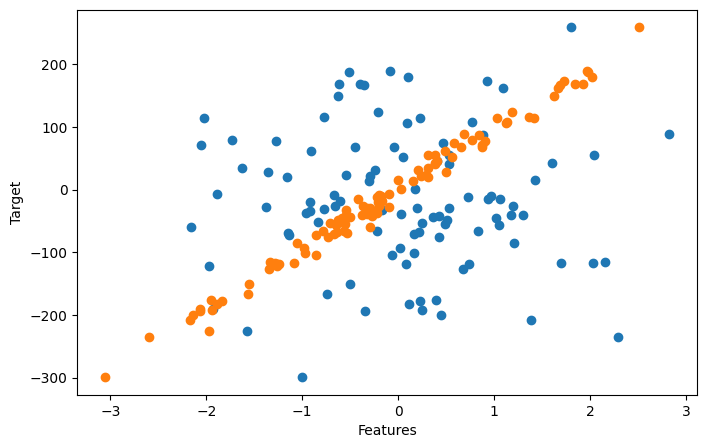

In [7]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

# Generate a regression problem
X, y = make_regression(
    n_samples=100,
    n_features=2,
    n_informative=2,
    noise = 10,
    random_state=25
    )

# Visualize feature at index 1 vs target
plt.subplots(figsize=(8, 5))
plt.scatter(X[:, 0], y, marker='o')
plt.scatter(X[:, 1], y, marker='o')
plt.xlabel("Features")
plt.ylabel("Target")
plt.show()

# Analytical solution for linear regression

The analytical solution to the linear regression problem can be derived using matrix algebra. The goal is to find the coefficients \(\theta\) that minimize the mean squared error (MSE) between the predicted and actual target values.

The cost function for linear regression from earlier is given by:

$ J(\theta) = \frac{1}{2} \sum_{i=1}^m (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $


## Matrix definition of cost function
If we define $X$ as a matrix whose rows correspond to the feature vectors $x^{(i)}$ and $\hat{y}$ as a vector of target values, the cost function becomes:
$$ J(\theta) = \frac{1}{2} (X \theta - y)^T (X \theta - y) $$

We can see this as follows:

$X$ is an $m \times n$ matrix, where $m$ is the number of samples and $n$ is the number of features. The vector $\hat{y}$ is a vector of length $m$, containing the target values for each sample.

$$ X = \begin{bmatrix}
x_{0}^{(1)} & x_{1}^{(1)} & \cdots & x_{n}^{(1)} \\
x_{0}^{(2)} & x_{1}^{(2)} & \cdots & x_{n}^{(2)} \\
\vdots \\
x_{0}^{(m)} & x_{1}^{(m)} & \cdots & x_{n}^{(m)} \\
\end{bmatrix} $$

$$ \hat{y} = \begin{bmatrix}
y_{}^{(1)} \\
y_{}^{(2)} \\
\vdots \\
y_{}^{(m)} \\
\end{bmatrix} $$

With $h_\theta(x^{(i)}) = (x^{(i)})^T \theta $, we can write the error vector as:

$$ X\theta - y = \begin{bmatrix}
(x^{(1)})^T \theta - y_{}^{(1)} \\
(x^{(2)})^T \theta - y_{}^{(2)} \\
\vdots \\
(x^{(m)})^T \theta - y_{}^{(m)} \\
\end{bmatrix} =  \begin{bmatrix}
h_\theta(x^{(1)}) - y_{}^{(1)} \\
h_\theta(x^{(2)}) - y_{}^{(2)} \\
\vdots \\
h_\theta(x^{(m)}) - y_{}^{(m)} \\
\end{bmatrix} 
$$

Using $z^Tz = \sum_{j} z_j^2 $, with $z = X\theta - y$ and $z_j = (h_\theta(x^{(i)}) - y_{}^{(i)})$, we get:

$$ \frac{1}{2} (X \theta - y)^T (X \theta - y) = \frac{1}{2} \sum_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)})^2 = J(\theta) $$


## Minimizing the Cost Function

To minimize this cost function, we take the derivative with respect to $\theta$ and set it to zero:
$ \nabla_\theta J(\theta) = 0 $

And using the following rules:

$$ \begin{aligned}
\frac{d}{dx} (Ax) &= A \\
\frac{d}{dx} (x^TA) &= A^T \\
\frac{d}{dx} (x^T Ax) &= 2x^T A   - \text{(if A is symmetric)} \\
\end{aligned} $$

$ X^TX $ is symmetric.

And finally, we get:

$ \begin{aligned}
\nabla_\theta J(\theta) &= \nabla_\theta \frac{1}{2} (X \theta - y)^T (X \theta - y) \\
                        &= \frac{1}{2} \nabla_\theta ( (X\theta)^T (X\theta) - (X\theta)^T y - y^T (X \theta) - y^T y) \\
                        &= \frac{1}{2} \nabla_\theta ( \theta^T X^T X \theta - \theta^T X^T y - y^T X \theta - y^T y ) \\
                        &= \frac{1}{2} ( 2 \theta^T (X^T X) - (X^T y)^T - (y^T X) ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T X - y^TX - y^T X ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T X - 2 y^TX ) \\
                        &= \theta^T X^T X - y^TX \\
\end{aligned} $

Setting this to 0 finds us the points where it is minimised:

$ \theta^T X^T X - y^TX = 0 $

This leads to the normal equations:

$ \theta^T X^T X = y^TX $

$ (\theta^T X^T X)^T = (y^TX)^T $

$ X^T X \theta = X^T y $

These equations can be solved for $\theta$:

$$ \theta = (X^T X)^{-1} X^T y $$

In Python using NumPy, this looks like

```
    theta = np.linalg.inv(X.T @ X) @ (X.T @ y)
    theta = (np.linalg.inv(X.T @ X) @ (y.T @ X)).T
```


(This was with a bunch of help from especially these two sources:

https://math.stackexchange.com/questions/4177039/deriving-the-normal-equation-for-linear-regression

https://en.wikipedia.org/wiki/Matrix_calculus#Vector-by-vector_identities).

# Locally Weighted Linear Regression

Local weighted linear regression is a method for fitting a linear model to data points that are close to each other. It uses a weighting function to give more weight to the data points that are closer to the target point.

The weight function looks like a Guassian but is not exactly a Guassian (the weights are not random variables, this is just a way to model the reducing importance of examples as they move further from the target point and control how quickly it falls away). It is defined as:
$$ w_i = \exp(-\frac{(x^{(i)} - x)^2}{2\tau^2})  $$

The formula for the local weighted linear regression is:

$$ J(\theta) = \frac{1}{2} \sum_{i=1}^m w_i (h_\theta(x_{}^{(i)}) - y_{}^{(i)})^2 $$

In matrix form:

$$ J(\theta) = \frac{1}{2} (W X \theta - y)^T (W X \theta - y) $$

where W is a diagonal matrix with the weights $w_i$ on the diagonal.

Going through the derivative as before:

$ \begin{aligned}
\nabla_\theta J(\theta) &= \nabla_\theta \frac{1}{2} (WX \theta - y)^T (WX \theta - y) \\
                        &= \frac{1}{2} \nabla_\theta ( (WX\theta)^T (WX\theta) - (WX\theta)^T y - y^T (WX \theta) - y^T y) \\
                        &= \frac{1}{2} \nabla_\theta ( \theta^T X^T W^T X \theta - \theta^T X^T W^T y - y^T WX \theta - y^T y ) \\
                        &= \frac{1}{2} ( 2 \theta^T (X^T W^T X) - (X^T W^T y)^T - (y^T WX) ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T W^T X - y^TWX - y^T WX ) \\
                        &= \frac{1}{2} ( 2 \theta^T X^T W^T X - 2 y^TWX ) \\
                        &= \theta^T X^T W^T X - y^TWX \\
\end{aligned} $

Set to 0 and use the fact W is symmetric, gets to:

$ \begin{aligned}
\theta^T X^T W^T X - y^TWX &= 0 \\ 
\theta^T X^T W^T X &= y^TWX \\
(\theta^T X^T W^T X)^T &= (y^TWX)^T \\
X^T WX \theta &= X^T W^T y \\
\theta &= (X^T WX)^{-1} (X^T W^T y) \\
\theta &= (X^T WX)^{-1} (X^T W y) \\
\end{aligned} $

In [407]:
def local_weighted_linear_regression(X, y, tau, target_x):
    # Calculate the weights for each data point
    W = np.exp(-((X - target_x) ** 2) / (tau ** 2))
    W = np.diag(W.squeeze())
    print(f'{W=}')
    theta = np.linalg.inv(X.T @ W @ X) @ (X.T @ W @ y)
    print(f'{theta=}')
    return [target_x] @ theta

X_raw = [1, 2, 3, 4]
def translate_x(x):
    return np.array([x])

X = np.array([translate_x(x) for x in X_raw])
# y = np.array([1, 4, 9, 16])  # non-linear -- y = x^2 
y = np.array([6, 16, 32, 54])  # non-linear -- y = 3x^2 + x + 2
# y = np.array([7, 12, 17, 22])  # y = 5x + 2

# Tau is the "bandwidth", or how far away from the point we're interested in we look for neighbors.
# When very small, it only considers points very close to the target point.
tau = 0.1
print(local_weighted_linear_regression(X, y, tau, 2)) # close to 16, overfitting

# Bigger values of tau spread out the weighting. When very large, effectively all points are weighted equally. 
tau = 100000
print(local_weighted_linear_regression(X, y, tau, 2)) # close to the linear regression line, underfitting

# This should be the same as the locally weighted result with large tau
print(f'{gradient_descent(X, y)=}')

W=array([[3.72007598e-044, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 1.00000000e+000, 0.00000000e+000,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 3.72007598e-044,
        0.00000000e+000],
       [0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        1.91516960e-174]])
theta=array([8.])
16.0
W=array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])
theta=array([11.66666667])
23.333333332648888
gradient_descent(X, y)=array([11.66666667])


# MSE as maximum likelihood estimation

We originally set up the cost function as the sum of the squared differences between the predicted and actual values. This cost function is known as the 'mean squared error' (MSE). We then used gradient descent to choose $\theta$ values that minimise these differences.

Alternatively, we can look at maximising the likelihood of the data given our model. The likelihood is defined as:
$$ P(y \mid X, \theta) = \prod_{i=1}^n p(y_i \mid x_i, \theta) $$
where $p(y_i \mid x_i, \theta)$ is the probability of observing $y_i$ given the input $x_i$ and model parameters $\theta$. The likelihood function can be maximised using gradient ascent or other optimisation techniques.

Assuming:
$$ y_{(i)} = \theta^T x^{(i)} + \epsilon^{(i)} $$

where $\epsilon^{(i)}$ is a random noise term that follows a normal distribution with mean 0 and variance $\sigma^2$. The noise term helps to account for the uncertainty in our model including any unmodelled effects.

The normal distribution of $\epsilon^{(i)}$ is:

$$ \epsilon^{(i)} \sim N(0, \sigma^2) $$

$$ p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left( {-\frac{(\epsilon^{(i)})^2}{2\sigma^2}}\right) $$

Going back to $y_{(i)}$, it can be thought of as each value is centered on $\theta^T x^{(i)}$ but perturbed by the normally distributed noise around that mean:

$$ y_{(i)} | x^{(i);\theta} \sim N(\theta^T x^{(i)}, \sigma^2) $$
$$ p(y_{(i)} | x^{(i);\theta}) = \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left( {-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2}}\right) $$

## Likelihood

We can think of the likelihood of the data as the probability that each observation $y_{(i)}$ is generated by the model. This is given by:

$$ L(\theta) = L(\theta; X, y) = p(y | X; \theta) $$

$$ \begin{align*}
L(\theta) &= \prod_{i=1}^m p(y_{(i)} | x^{(i)};\theta) \\
&= \prod_{i=1}^m \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left( {-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2}}\right) \\
 \end{align*} $$

We want to maximise the likelihood of the parameters $\theta$. As the log function is a monotonic increasing function, we can maximise the log likelihood instead:
$$ \begin{align}
l(\theta) &= \log L(\theta) \\
 &= log \prod_{i=1}^m \frac{1}{\sqrt{2\pi\sigma^2}} \text{exp} \left( {-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2}}\right) \\
 &= \sum_{i=1}^m \log \left( \frac{1}{\sqrt{2\pi\sigma^2}} \right) \text{exp} \left( {-\frac{(y^{(i)} - \theta^Tx^{(i)})^2}{2\sigma^2}}\right) \\
 &= m \log \frac{1}{\sqrt{2\pi\sigma^2}} - \frac{1}{\sigma^2} \frac{1}{2} \sum_{i=1}^m (y^{(i)} - \theta^Tx^{(i)})^2 \\
\end{align} $$

At step (3), this is log of s product equals sum of the logs.

Thus maximising $l(\theta)$ is equivalent to minimising:

$$ \frac{1}{2} \sum_{i=1}^m (y^{(i)} - \theta^Tx^{(i)})^2 $$

which is $J(\theta)$.

# Logistic Regression

In order to classify data points into two classes, we can use logistic regression. The logistic function is a sigmoid function that maps any real number to a value between 0 and 1. It is defined as:

$$ g(z) = \frac{1}{1 + e^{-z}} $$

This is called the 'sigmoid' or 'logistic' function. The hypothesis function for logistic regression is:

$$ h_\theta(x) = g(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}} $$

The logistic function looks like this:

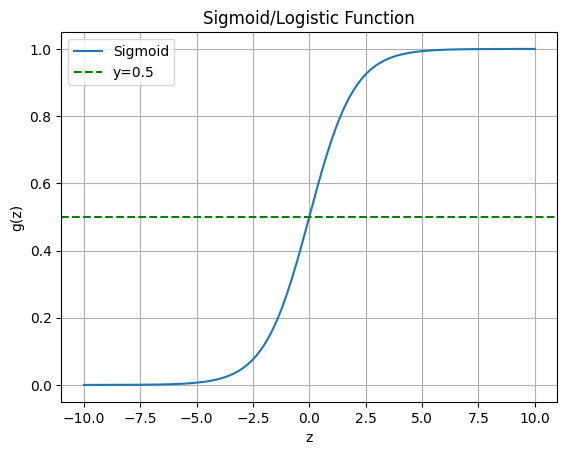

In [104]:
# illustrate a sigmoid curve
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

z_values = np.linspace(-10, 10, 20*10)
plt.plot(z_values, sigmoid(z_values), label='Sigmoid')
plt.axhline(0.5, color='green', linestyle='--', label='y=0.5')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Sigmoid/Logistic Function')
plt.legend()
plt.show()

$$ P(y=1 | x; \theta) = h_{\theta}(x) $$
$$ P(y=0 | x; \theta) = 1 - h_{\theta}(x) $$

We can combine these into a single probability distribution:

$$ P(y | x; \theta) = h_{\theta}(x)^y (1 - h_{\theta}(x))^{(1-y)} $$

This works because $ y \in \{0, 1\} $ and so if y is 0 then the first term will be 1 and the second term will be just $(1 - h_{\theta}(x))$. Similarly, if y is 1 then the second term will be 1 and the first will be just $h_{\theta}(x)$. This way we can model both cases with a single probability distribution.

Going back to the maximum likelihood:

$$ \begin{align}

L(\theta) &= P(y | x; \theta) \\
&= \prod_{i=1}^m (h_{\theta}(x^{(i)}))^{y^{(i)}} (1 - h_{\theta}(x^{(i)}))^{(1-y^{(i)})} \\

l(\theta) &= \log L(\theta) \\
&= \sum_{i=1}^m \log P(y | x; \theta) \\
&= \sum_{i=1}^m \log (h_{\theta}(x^{(i)}))^{y^{(i)}} (1 - h_{\theta}(x^{(i)}))^{(1-y^{(i)})} \\
&= \sum_{i=1}^m y^{(i)} \log (h_{\theta}(x^{(i)})) + (1-y^{(i)}) \log (1 - h_{\theta}(x^{(i)})) \\
\end{align} $$

To maximise the function we would use gradient *ascent*: in this case, when we update $\theta$ we will *add* a fraction of the gradient to it.

In this case there is no closed form solution to go straight to the parameters $\theta$.

The update rule for gradient ascent in this case is:

$$ \theta_j := \theta_j + \alpha ( y^{(i)} - h_{\theta}(x^{(i)}) ) x_j^{(i)} $$

Comparing to the linear regression update rule, we are adding the gradient and the error is the opposite sign.

In [1093]:
def logistic_update_theta(theta, alpha, grad):
    return theta + alpha * grad

def gradient_ascent(X, y, alpha=0.001, num_iterations=100000):
    """
    (Batch) gradient ascent algorithm for logistic regression.
    """
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)

    for i in range(num_iterations):
        # Calculate the predictions
        y_pred = sigmoid(X @ theta)
        # Calculate the gradients
        grad = ((y - y_pred) @ X)
        # Update the parameters
        theta = logistic_update_theta(theta, alpha, grad)
        print(f'{i}: {theta=} {grad=}')
    return theta

def stochastic_gradient_ascent(X, y, alpha=0.01, num_iterations=100000):
    """
    Stochastic gradient ascent algorithm for logistic regression.
    """
    n = X.shape[1]
    # theta = np.random.rand(n)
    theta = np.zeros(n)
    for i in range(num_iterations):
        for j in range(X.shape[0]):
            y_pred_j = sigmoid(X[j] @ theta)
            error = y[j] - y_pred_j
            grad = error * X[j]
            theta = logistic_update_theta(theta, alpha, grad)
        if i % 10000 == 0:
            print(f'{i}: {theta=} {grad=}')
    return theta

X_raw = [1, 2, 3, 4, 5, 6, 7]
def translate_x(x):
    return np.array([1, x])
# try this adding x**2, x**3, x%2 ...
# adding these affects the classification of a single boundary negatively
# if we have two boundaries, perhaps we need a quadratic to model? That would make sense.

X = np.array([translate_x(x) for x in X_raw])
y = np.array([0, 0, 0, 0, 0, 1, 1]) # one boundary
#y = np.array([1, 1, 0, 0, 0, 1, 1]) # two boundaries

#theta = gradient_ascent(X, y, num_iterations=1000000)
theta = stochastic_gradient_ascent(X, y)
print("Final theta:", theta)

def calculate_loss(X, y, theta):
    predictions = sigmoid(X @ theta)
    loss = np.sum((predictions - y) ** 2)
    return loss

print(f'Loss after training: {calculate_loss(X, y, theta)}')

print(f'{sigmoid(X @ theta)}')
print(f'{sigmoid(translate_x(2.5) @ theta)}')


0: theta=array([-0.01212983,  0.00597539]) grad=array([0.5625667, 3.9379669])
10000: theta=array([-13.69640352,   2.52106124]) grad=array([0.01904914, 0.13334395])
20000: theta=array([-17.85466141,   3.27218673]) grad=array([0.00638465, 0.04469255])
30000: theta=array([-20.75330448,   3.79679128]) grad=array([0.0029507 , 0.02065487])
40000: theta=array([-23.02510448,   4.208389  ]) grad=array([0.00160534, 0.01123735])
50000: theta=array([-24.90549804,   4.54930143]) grad=array([0.00096818, 0.00677723])
60000: theta=array([-26.51371706,   4.84100244]) grad=array([0.0006276 , 0.00439317])
70000: theta=array([-27.92015812,   5.09618931]) grad=array([0.00042929, 0.00300502])
80000: theta=array([-29.1704266 ,   5.32309705]) grad=array([0.00030616, 0.00214311])
90000: theta=array([-30.29597691,   5.52741032]) grad=array([0.00022577, 0.00158037])
Final theta: [-31.31941409   5.71321722]
Loss after training: 0.0060156110974488464
[7.57477953e-12 2.29397516e-09 6.94715716e-07 2.10346252e-04
 5.

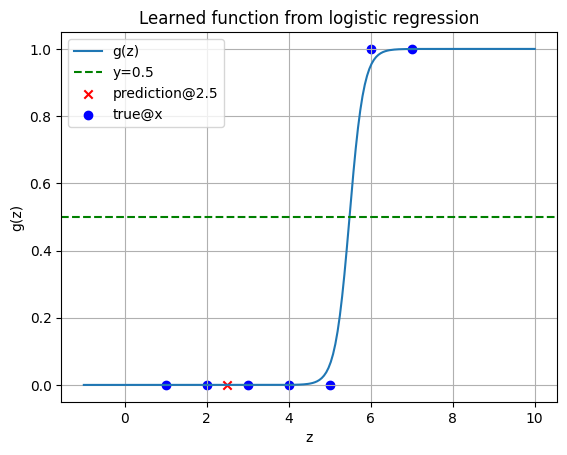

In [597]:
z_values = np.linspace(-1, 10, 20*10)
plt.plot(z_values, [sigmoid(translate_x(z) @ theta) for z in z_values], label='g(z)')
plt.axhline(0.5, color='green', linestyle='--', label='y=0.5')
# plt.axvline(2.48, color='red', linestyle='--', label='x=2.5')
plt.scatter(2.5, sigmoid(translate_x(2.5) @ theta), marker='x', color='red', label='prediction@2.5')
plt.scatter(X_raw, y, marker='o', color='blue', label='true@x')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Learned function from logistic regression')
plt.legend()
plt.show()

In [598]:
# needed really small steps to converge on x**2 function
theta = stochastic_gradient_descent(X, y, alpha=0.00005, num_iterations=10000)
print("Final theta:", theta)

def calculate_loss(X, y, theta):
    predictions = X @ theta
    loss = np.sum((predictions - y) ** 2)
    return loss

print(f'Loss after training: {calculate_loss(X, y, theta)}')

print(f'{X @ theta}')
print(f'{translate_x(2.5) @ theta}')


0: theta=array([0.5206223 , 0.53479064]) grad=array([ 3.27233761, 22.90636328])
Final theta: [0.00130815 0.09190964]
Loss after training: 0.7944951777786271
[0.09321779 0.18512742 0.27703706 0.3689467  0.46085634 0.55276597
 0.64467561]
0.2310822435167473


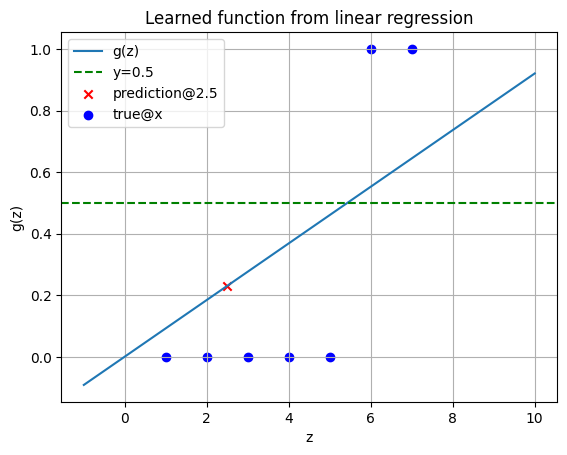

In [599]:
z_values = np.linspace(-1, 10, 20*10)
plt.plot(z_values, [translate_x(z) @ theta for z in z_values], label='g(z)')
plt.axhline(0.5, color='green', linestyle='--', label='y=0.5')
plt.scatter(2.5, translate_x(2.5) @ theta, marker='x', color='red', label='prediction@2.5')
plt.scatter(X_raw, y, marker='o', color='blue', label='true@x')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Learned function from linear regression')
plt.legend()
plt.show()

Interestingly from the above experimentation, 1 boundary is poorly learned by a feature input that includes the squared (or greater) coordinates. I am not quite sure why the squared term doesn't just end up converging to zero like it does in linear regression.

To learn two boundaries, you need the squared terms included (so a parabola is formed which allows the boundary to cross again). For three boundaries, you would need the cubed term, etc..

# Newtons Method for Optimization

This is a simple iterative method for finding the minimum of a function. It works by starting with an initial guess and then iteratively improving it until it converges to the minimum.

The method works by updating the guess based on the gradient of the function at that point. The gradient is a vector that points in the direction of steepest ascent of the function, and it can be computed using finite differences or numerical methods. The method continues until the gradient norm is less than a specified tolerance or the maximum number of iterations is reached. The final guess is returned as the solution to the optimization problem.

$$ \theta := \theta - \frac{f(\theta)}{f'(\theta)} $$

Recall that we wanted to maximise the log-likelihood $l(\theta)$.

The maxima (and minima) of a function $f(\theta)$ occur at points where its derivative $f'(\theta)$ is zero.

So to maximise $l(\theta)$, we need to find the points where the derivative $l'(\theta)$ is zero. The update rule is then:

$$ \theta = \theta - \frac{l'(\theta)}{l''(\theta)} $$

As we are dealing with vectors, this becomes:

$$ \theta = \theta - H^{-1} \nabla_{\theta} l(\theta) $$

This is called the Newton-Raphson method.

In [1046]:
def newtons_method(X, y, tol=1e-6, max_iterations=100):
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)

    for i in range(max_iterations):
        # Calculate the predictions
        y_pred = X @ theta
        # Calculate the gradients
        grad = ((y_pred - y) @ X)
        if np.linalg.norm(grad) < tol:
            return theta
        # Update the parameters
        H = X.T @ X
        H_inv = np.linalg.inv(H)
        theta = theta - H_inv @ grad
        print(f'{i}: {theta=} {grad=}')
    return theta

def stochastic_newtons_method(X, y, tol=1e-9, max_iterations=100):
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)
    for i in range(max_iterations):
        for j in range(X.shape[0]):
            y_pred_j = X[j] @ theta
            error = y_pred_j - y[j]
            grad = error * X[j]
            if np.linalg.norm(grad) < tol:
               return theta
            H = X.T @ X  # hessian of the cost function is derived in the linalg notebook
            theta = theta - np.linalg.inv(H) @ grad
        print(f'{i}: {theta=} {grad=}')
    return theta

X_raw = [1, 2, 3, 4]
def translate_x(x):
    return np.array([1, x, x**2])

X = np.array([translate_x(x) for x in X_raw])

# Output:
# y = np.array([1, 4, 9, 16])  # non-linear -- y = x^2 
y = np.array([6, 16, 32, 54])  # non-linear -- y = 3x^2 + x + 2
# y = np.array([7, 12, 17, 22])  # y = 5x + 2
#y = np.array([14, 35, 42, 65])  # non-linear -- y = 3x^2 + x + 2 + z

# X = np.array([[1, 1, -2, 6], [1, 2, 6, 11], [1, 3, 12, -9], [1, 4, 2, 0]]) # [1, a, b, c]
# y = np.array([-1, 8, 15, 6])  # y = a + b
# y = np.array([-7, -3, 24, 6])  # y = a + b - c


theta = stochastic_newtons_method(X, y, max_iterations=1000)

print(f'{X @ theta=}')

0: theta=array([ 7.40767506, -4.87838218,  4.0005912 ]) grad=array([ -41.92788999, -167.71155996, -670.84623982])
1: theta=array([ 3.46657834, -0.56847169,  3.29364681]) grad=array([ -2.17918854,  -8.71675415, -34.86701662])
2: theta=array([2.33837629, 0.63893079, 3.0686577 ]) grad=array([-0.14754687, -0.59018746, -2.36074986])
3: theta=array([2.07586049, 0.91908049, 3.01543576]) grad=array([-0.01690865, -0.0676346 , -0.27053839])
4: theta=array([2.01691049, 0.98196269, 3.00344301]) grad=array([-0.00301107, -0.0120443 , -0.04817719])
5: theta=array([2.00376528, 0.99598385, 3.00076672]) grad=array([-0.00063467, -0.00253869, -0.01015474])
6: theta=array([2.00083818, 0.99910598, 3.00017068]) grad=array([-0.00013959, -0.00055837, -0.00223347])
7: theta=array([2.00018658, 0.99980099, 3.00003799]) grad=array([-3.09926526e-05, -1.23970610e-04, -4.95882442e-04])
8: theta=array([2.00004153, 0.9999557 , 3.00000846]) grad=array([-6.89501150e-06, -2.75800460e-05, -1.10320184e-04])
9: theta=array([

You can see this converges very quickly, but the downside is that each iteration may be slow, particularly if you have many features resulting in a large Hessian which you must invert.

Note that the batch equivalent actually jumps directly to the final result:

$$ \begin{align*}

\theta_{next} &= \theta - H^{-1} \nabla J(\theta) \\

 &= \theta - (X^TX)^{-1} (X^TX\theta - X^Ty) \\
 &= \theta - (X^TX)^{-1}(X^TX\theta) + (X^TX)^{-1}(X^Ty) \\
 &= \theta - \theta + (X^TX)^{-1}(X^Ty) \\
 &= (X^TX)^{-1}(X^Ty) \\

\end{align*} $$

i.e. the closed form solution.

In [196]:
def locally_weighted_logistic_regression(X, y, tau, target_x, alpha=0.01, num_iterations=10000):
    # Calculate the weights for each data point
    print(f'{X=}')
    W = np.exp(-((X - target_x[1]) ** 2) / (tau ** 2))
    W = np.diag(W.T[1])
    n = X.shape[1]
    theta = np.random.rand(n)
    # theta = np.zeros(n)

    for i in range(num_iterations):
        # Calculate the predictions
        y_pred = sigmoid(X @ theta)
        # Calculate the gradients
        grad = ((y - y_pred) @ W @ X)
        # Update the parameters
        theta = theta + alpha * grad
        # print(f'{i=}: {theta=}')
    return theta, sigmoid(target_x @ theta), W

def threshold(x, threshold=0.5):
    return x > threshold

X_raw = [1, 2, 3, 4, 5, 6, 7]
def translate_x(x):
    return np.array([1, x])
# try this adding x**2, x**3, x%2 ...
# adding these affects the classification of a single boundary negatively
# if we have two boundaries, perhaps we need a quadratic to model? That would make sense.

X = np.array([translate_x(x) for x in X_raw])
y = np.array([0, 0, 0, 0, 0, 1, 1]) # one boundary
#y = np.array([1, 1, 0, 0, 0, 1, 1]) # two boundaries

target = 5.75
theta, result, weights = locally_weighted_logistic_regression(X, y, 1, translate_x(target))
print(f'{theta=}')
print(f'{threshold(result)=}')
W = np.diag(weights)
print(f'weights={W/sum(W)}') # normalize weights


X=array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [1, 7]])
theta=array([-5.83917081,  1.16674294])
threshold(result)=True
weights=[8.99944840e-11 4.42302086e-07 2.94193532e-04 2.64824578e-02
 3.22622382e-01 5.31914383e-01 1.18686141e-01]


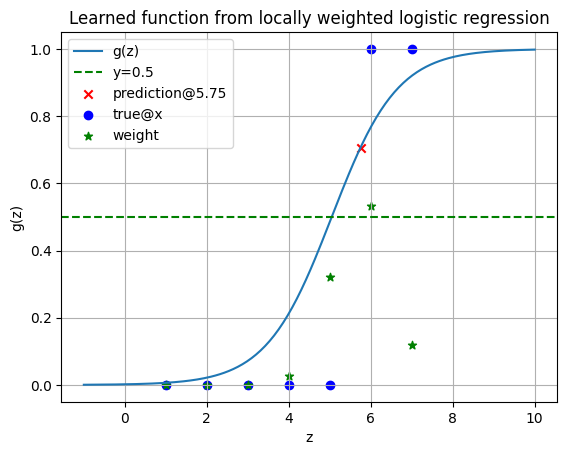

In [1045]:
z_values = np.linspace(-1, 10, 20*10)
plt.plot(z_values, [sigmoid(translate_x(z) @ theta) for z in z_values], label='g(z)')
plt.axhline(0.5, color='green', linestyle='--', label='y=0.5')
# plt.axvline(2.48, color='red', linestyle='--', label='x=2.5')
plt.scatter(target, sigmoid(translate_x(target) @ theta), marker='x', color='red', label=f'prediction@{target}')
plt.scatter(X_raw, y, marker='o', color='blue', label='true@x')
plt.scatter(X_raw, W/sum(W), marker='*', color='green', label='weight')
plt.grid(True)
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Learned function from locally weighted logistic regression')
plt.legend()
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define region parameters
region_size = 100
num_regions = 10
spacing = 50  # Pixels between regions to prevent overlap

total_size = 1000

# Calculate block size and number of blocks
block_size = region_size + spacing
num_blocks_x = total_size // block_size
num_blocks_y = total_size // block_size
total_blocks = num_blocks_x * num_blocks_y

# Generate random unique block indices for placing regions
block_indices = np.random.choice(total_blocks, num_regions, replace=False)

# Calculate starting positions for each region within their blocks
start_positions = []
for idx in block_indices:
    x_block = idx % num_blocks_x
    y_block = idx // num_blocks_y

    # Ensure the last block doesn't exceed array bounds
    if x_block == (num_blocks_x - 1) and (block_size * x_block + region_size > total_size):
        x_start = total_size - region_size
        y_start = (y_block * block_size)
    else:
        x_start = x_block * block_size
        y_start = y_block * block_size

    start_positions.append((x_start, y_start))

# Initialize the array with zeros
array = np.zeros((total_size, total_size), dtype=np.uint8)

# Assign 1s to each region based on their starting positions
for x_start, y_start in start_positions:
    x_end = x_start + region_size - 1
    y_end = y_start + region_size - 1

    # Slice the array and set values to 1 within the region
    array[x_start:x_end+1, y_start:y_end+1] = 1

# Display the resulting array
print(f"{total_size}x{total_size} Array with Randomly Placed 20x20 Regions of 1's:")
print(array)

1000x1000 Array with Randomly Placed 20x20 Regions of 1's:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


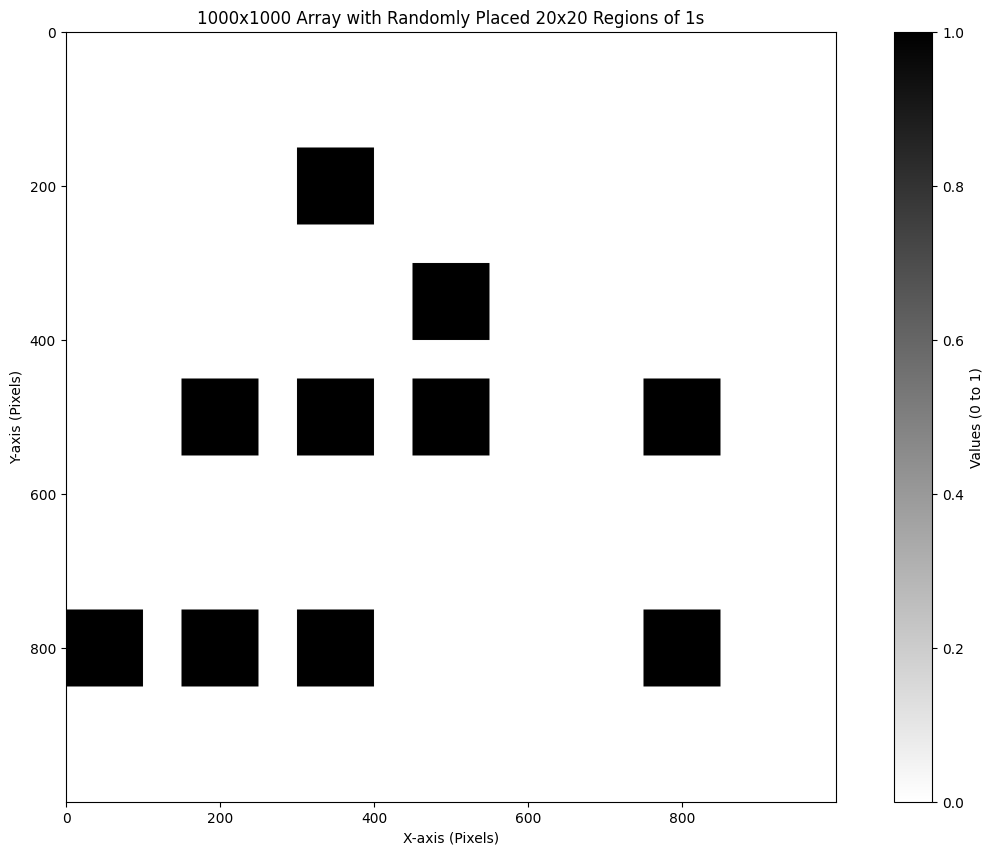

In [92]:
plt.figure(figsize=(15, 10))
plt.imshow(array, cmap='binary')
plt.title('1000x1000 Array with Randomly Placed 20x20 Regions of 1s')
plt.xlabel('X-axis (Pixels)')
plt.ylabel('Y-axis (Pixels)')
plt.colorbar(label='Values (0 to 1)')
plt.show()

In [221]:
X = []
y = []
for index, label in np.ndenumerate(array):
    if np.random.rand() < 0.01:
        X.append(index)
        y.append(label)

# def translate_x(x):
#     return np.array([1, x[0], x[1], x[0]**2, x[1]**2])

# X = np.array([translate_x(x) for x in X])
X = np.array(X)
y = np.array(y)
print(f'{len(X)=} {len(y)=} {len(list(filter(None, y)))=}')
print(X.shape)
print(y.shape)

len(X)=10027 len(y)=10027 len(list(filter(None, y)))=1017
(10027, 2)
(10027,)


In [102]:
def locally_weighted_logistic_newtons(X, y, target_x, tau=1, tol=1e-6, lda=0.01, max_iterations=100, verbose=False):
    """
    Locally weighted logistic regression using Newton's method.
    """
    # Calculate the weights for each data point
    W = np.exp(-(np.sum((X - target_x) ** 2, axis=1)) / (tau ** 2))
    # W = np.diag(W.T)
    n = X.shape[1]
    theta = np.random.rand(n)
    theta = np.zeros(n)

    for i in range(max_iterations):
        # Calculate the predictions
        y_pred = sigmoid(X @ theta)
        # Calculate the gradients
        grad = (X.T @ (W * (y - y_pred))) - lda*theta
        if np.linalg.norm(grad) < tol:
            return theta, sigmoid(target_x @ theta), W, i
        # Update the parameters
        D = np.diag(-W * y_pred * (1-y_pred))
        H = X.T @ D @ X - lda*np.eye(n)
        H_inv = np.linalg.inv(H)
        theta = theta - H_inv @ grad
        if verbose:
            print(f'{i=}: {theta=} {sum(y_pred)=}')
    return theta, sigmoid(target_x @ theta), W, i


In [ ]:
point_radius = 10
def clip(x, low=0, high=1000):
    return max(min(x, high), low)

import functools
import time
from contextlib import contextmanager

@contextmanager
def time_it(name):
    start_time = time.time()
    yield
    end_time = time.time()
    print(f'{name}: {end_time-start_time:.2f} seconds')

r = np.zeros_like(array)
for (i,j),_ in np.ndenumerate(array):
    if np.random.random() < 0.005:
        with time_it(f'{i},{j}'):
            theta, result, weights, iterations_taken = locally_weighted_logistic_newtons(X, y, target_x=[i,j], tau=1, lda=0.5, verbose=False)
        #print(f'{i},{j}: {threshold(result)} {theta=} {result=} {sum(weights)=} {iterations_taken=}')
        if threshold(result):
            r[clip(i-point_radius):clip(i+point_radius),clip(j-point_radius):clip(j+point_radius)] = 100
        # else:
        #     r[clip(i-point_radius):clip(i+point_radius),clip(j-point_radius):clip(j+point_radius)] -= 1

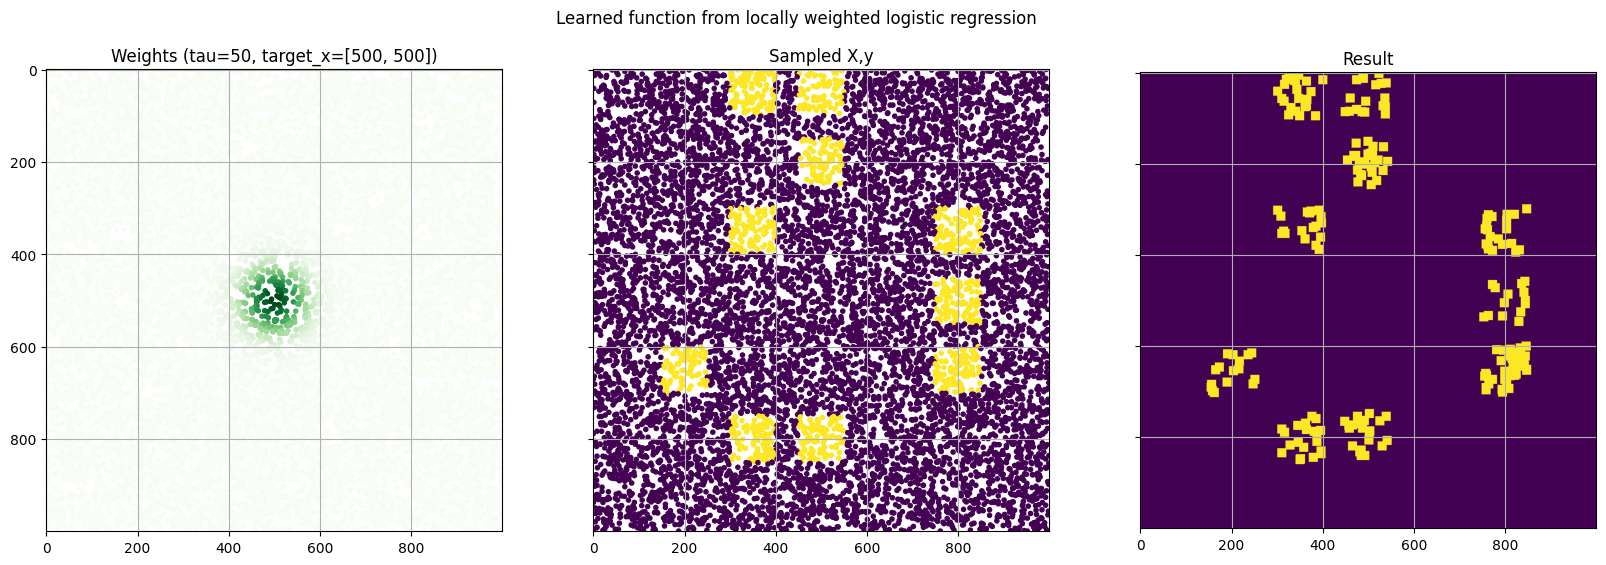

In [1603]:
tau = 50
target_x = [500,500]
W = np.exp(-(np.sum((X - target_x) ** 2, axis=1)) / (2*(tau ** 2)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), sharex=True, sharey=True)
ax1.scatter(X.T[1], X.T[0], c=W/sum(W), marker='.', label='weight', cmap="Greens")
ax2.scatter(X.T[1], X.T[0], c=y, marker='.', label='Sampled X,y')
ax3.imshow(r) #, cmap="binary")
ax1.set_title(f'Weights ({tau=}, {target_x=})')
ax2.set_title('Sampled X,y')
ax3.set_title('Result')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
fig.suptitle('Learned function from locally weighted logistic regression')
plt.show()

In [1622]:
# toy example to check weights calculation
x_1 = []
for index, value in np.ndenumerate(np.zeros((5,5))):
    x_1.append(index)
x_1 = np.array(x_1)
target_x = [2,2]
print(x_1.T)
print((x_1 - target_x).T)
tau = 5
w_1 = np.exp(-(np.sum((x_1 - target_x) ** 2, axis=1)) / (2*(tau ** 2)))
# print(np.array([w_1]).T)

r = np.zeros((5,5))
for (i,j), v in zip(x_1, w_1):
    r[i,j] = v
print(r)

[[0 0 0 0 0 1 1 1 1 1 2 2 2 2 2 3 3 3 3 3 4 4 4 4 4]
 [0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4 0 1 2 3 4]]
[[-2 -2 -2 -2 -2 -1 -1 -1 -1 -1  0  0  0  0  0  1  1  1  1  1  2  2  2  2
   2]
 [-2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1  2 -2 -1  0  1
   2]]
[[0.85214379 0.90483742 0.92311635 0.90483742 0.85214379]
 [0.90483742 0.96078944 0.98019867 0.96078944 0.90483742]
 [0.92311635 0.98019867 1.         0.98019867 0.92311635]
 [0.90483742 0.96078944 0.98019867 0.96078944 0.90483742]
 [0.85214379 0.90483742 0.92311635 0.90483742 0.85214379]]


In [215]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device = "mps" if torch.backends.mps.is_available() else device
# device = "cpu"
print(device)
torch.set_default_device(device)

mps


In [222]:
x_train = torch.from_numpy(X.astype(np.float32)).to(device)
y_train = torch.from_numpy(y.astype(np.float32)).to(device)

In [224]:
def locally_weighted_logistic_newtons_pytorch(X, y, target_x, tau=1, tol=1e-6, lda=0.01, max_iterations=100, verbose=False):
    """
    Locally weighted logistic regression using Newton's method running on pytorch.
    """
    # Calculate the weights for each data point
    W_np = np.exp(-(np.sum((X.numpy(force=True) - target_x) ** 2, axis=1)) / (tau ** 2))
    W = torch.from_numpy(W_np.astype(np.float32)).to(device)
    n = X.shape[1]
    theta = torch.randn(n, device=device)
    theta = torch.zeros(n, device=device)

    for i in range(max_iterations):
        # Calculate the predictions
        y_pred = torch.sigmoid(X @ theta)
        # Calculate the gradients
        error = (W * (y - y_pred))
        # print(f'{error.shape=} {error.dtype=} {X.T.shape=} {X.T.dtype=} {W.dtype=}')
        grad = (X.T @ error) - lda*theta
        if torch.linalg.norm(grad) < tol:
            break
        # Update the parameters
        D = torch.diag(-W * y_pred * (1-y_pred))
        H = X.T @ D @ X - lda*torch.eye(n, device=device)
        H_inv = torch.linalg.inv(H)
        theta = theta - H_inv @ grad
        if verbose:
            print(f'{i=}: {theta=} {sum(y_pred)=}')
    return theta.numpy(force=True), torch.sigmoid((torch.tensor(target_x, dtype=torch.float32, device=device) @ theta)), W.numpy(force=True), i


In [226]:
VERBOSE = False
point_radius = 10
def clip(x, low=0, high=1000):
    return max(min(x, high), low)

import time
from contextlib import contextmanager

@contextmanager
def time_it(name, verbose=True):
    start_time = time.time()
    yield
    end_time = time.time()
    if verbose:
        print(f'{name}: {end_time-start_time:.2f} seconds')

r = np.zeros_like(array)
for (i,j),_ in np.ndenumerate(array):
    if np.random.random() < 0.005:
        with time_it(f'{i},{j}', verbose=VERBOSE):
            theta, result, weights, iterations_taken = locally_weighted_logistic_newtons_pytorch(x_train, y_train, target_x=[i,j], tau=1, lda=0.5, verbose=VERBOSE)
        if VERBOSE:
            print(f'{i},{j}: {threshold(result)} {theta=} {result=} {sum(weights)=} {iterations_taken=}')
        if threshold(result):
            r[clip(i-point_radius):clip(i+point_radius),clip(j-point_radius):clip(j+point_radius)] = 100
        # else:
        #     r[clip(i-point_radius):clip(i+point_radius),clip(j-point_radius):clip(j+point_radius)] -= 1

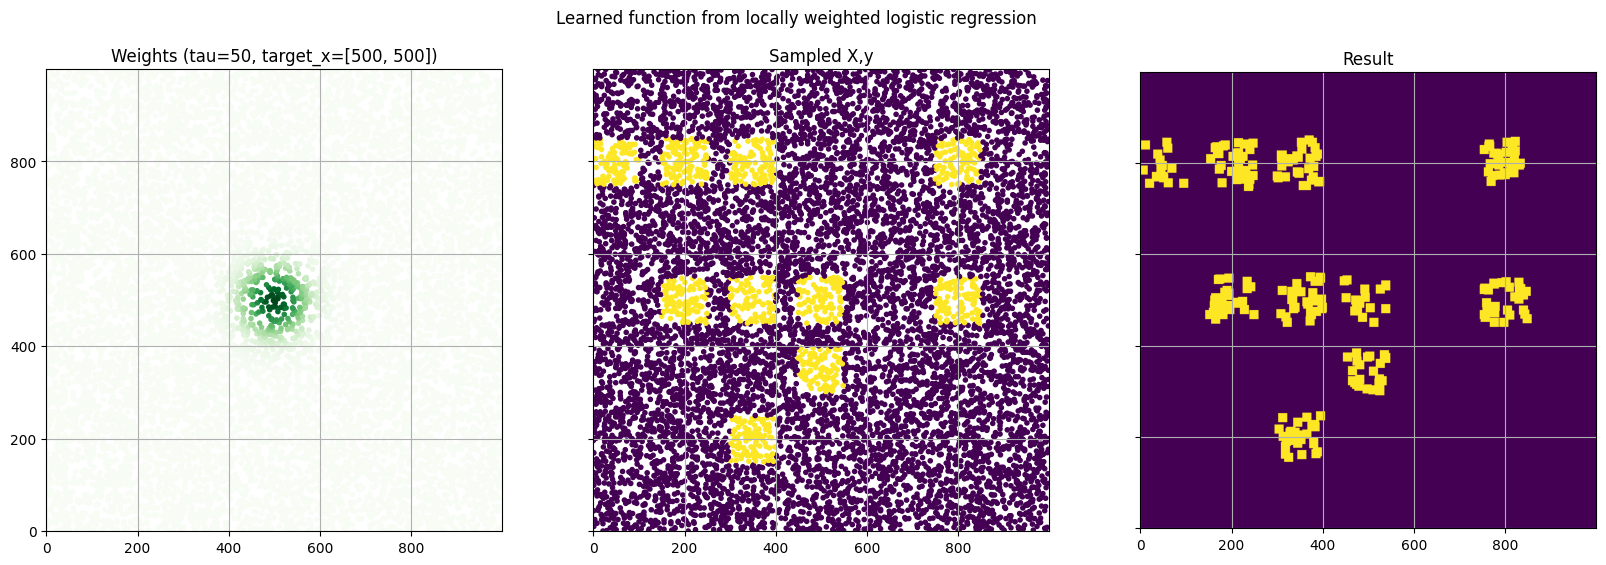

In [227]:
tau = 50
target_x = [500,500]
W = np.exp(-(np.sum((X - target_x) ** 2, axis=1)) / (2*(tau ** 2)))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6), sharex=True, sharey=True)
ax1.scatter(X.T[1], X.T[0], c=W/sum(W), marker='.', label='weight', cmap="Greens")
ax2.scatter(X.T[1], X.T[0], c=y, marker='.', label='Sampled X,y')
ax3.imshow(r) #, cmap="binary")
ax1.set_title(f'Weights ({tau=}, {target_x=})')
ax2.set_title('Sampled X,y')
ax3.set_title('Result')
ax1.invert_yaxis()
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
fig.suptitle('Learned function from locally weighted logistic regression')
plt.show()

In [229]:
print('torch on gpu')
a = torch.randn(1000,1000, dtype=torch.float32, device='mps')
b = torch.randn(1000,1000, dtype=torch.float32, device='mps')
%timeit ainv = torch.linalg.inv(a)       # gpu slower than torch cpu
%timeit ab = torch.matmul(a, b)          # gpu quicker than torch cpu
print('torch on cpu')
a = torch.randn(1000,1000, dtype=torch.float32, device='cpu')
b = torch.randn(1000,1000, dtype=torch.float32, device='cpu')
%timeit ainv = torch.linalg.inv(a)       # uses accelerate
%timeit ab = torch.matmul(a, b)          # uses accelerate
print('numpy')
a = np.random.randn(1000,1000).astype(np.float32)
b = np.random.randn(1000,1000).astype(np.float32)
%timeit ainv = np.linalg.inv(a)          # uses openblas
%timeit ab = np.matmul(a, b)             # uses openblas

torch on gpu
19.9 ms ± 787 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
397 μs ± 1.05 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
torch on cpu
3.56 ms ± 82.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
755 μs ± 19.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
numpy
23 ms ± 1.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
7.53 ms ± 204 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
